# MNIST classification using a standard CNN

Here we will perform classification on the MNIST dataset. We will use 2 sets of convolution & pooling layers, before processing via the fully-connected layers. The convolution layers will have 5 filters.

In [183]:
import numpy as np
import tensorflow as tf

# Loading the dataset
dataset = tf.keras.datasets.mnist.load_data()
training_set, test_set = dataset

### Viewing a sample

Below is a randomised sample from the training set, visualised in false colour. Note that there are 60,000 sampes to choose from, so i must be in the range (0, 59999) inclusive.

If you run the cell after, the images will be resized to 4-dimensions. Rerun the above code cell to reset the dataset.

Label = 3


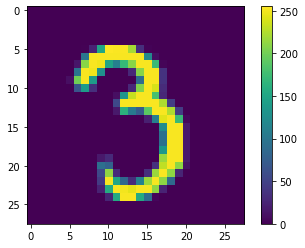

In [184]:
import matplotlib.pyplot as plt
from random import randint

i = randint(0, 59999)
print('Label = {}'.format(training_set[1][i]))
plt.imshow(training_set[0][i])
plt.colorbar()
plt.show()

In [164]:
# Reshaping to 4D arrays and normalisation for the CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

(60000, 28, 28, 1)

In [174]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense 

model = tf.keras.models.Sequential()

# Add layers
model.add(Conv2D(filters=5, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=5, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compilation of layers and fitting
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x=x_train, y=y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 815us/sample - loss: 0.3587 - accuracy: 0.8874
Epoch 2/5
60000/60000 [==============================] - 41s 686us/sample - loss: 0.1591 - accuracy: 0.9490
Epoch 3/5
60000/60000 [==============================] - 42s 700us/sample - loss: 0.1248 - accuracy: 0.9601
Epoch 4/5
60000/60000 [==============================] - 37s 624us/sample - loss: 0.1063 - accuracy: 0.9665
Epoch 5/5
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0949 - accuracy: 0.9693


In [182]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 236us/sample - loss: 0.0548 - accuracy: 0.9822


[0.054815794108528645, 0.9822]

### Results (accuracy)
0.984: filters=5, kernel_size = 3x3, pool_size=2x2, no Dropout(), units=64 epochs=5

0.9813: filters=5, kernel_size = 3x3, pool_size=2x2, Dropout(0.2), units=54, epochs=5

0.9857: filters=5, kernel_size = 3x3, pool_size=2x2, no Dropout(), units=128 epochs=5

0.9822: filters=5, kernel_size = 3x3, pool_size=2x2, Dropout(0.2), units=128 epochs=5